In [ ]:
# install required libraries
!pip install astroML

In [2]:
# Import necessary libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

from astroML.resample import bootstrap
from astroML.stats import median_sigmaG
from astroML.plotting import setup_text_plots

## Question 1

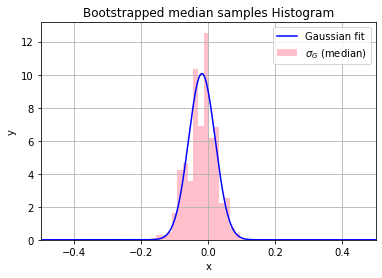

In [3]:
# declaring number of samples and bootstrap samples
samples = 1000
bootstrap_samples = 10000

#drawing 1000 samples from normal distribution
data = stats.norm(0, 1).rvs(samples)    

#drawing 10000 bootstrapped samples
median, sigma_g = bootstrap(data, bootstrap_samples, median_sigmaG, kwargs = dict(axis=1))
x = np.linspace(-2, 2, 5000)

sigma = np.sqrt(np.pi/(2.0*samples))

# generating pdf
pdf = stats.norm(np.mean(median), sigma).pdf(x)

#plotting histogram of bootstrapped median samples and its gaussian fit
#gaussian fit
plt.plot(x, pdf, color='blue', label='Gaussian fit')

#histogram
plt.hist(median, bins=20, density=True, histtype='stepfilled', color='pink', ls='-.', label=r'$\sigma_G\ {\rm (median)}$')

plt.title('Bootstrapped median samples Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5,0.5)
plt.grid()
plt.legend()
plt.show()

## Question 2

Parameters for best-fit values are
b = 34.04773403259783 & m = 2.2399207961186938


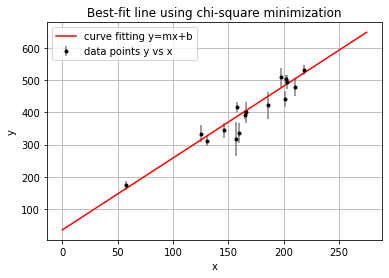

In [4]:
# defining curve fitting function (will use in curve_fit function of scipy.optimize library)
def fit_function(x,b,m):
    y = m*x + b
    return y

# getting data from the source
data = np.array([[5, 203, 495, 21, 5, -0.33], [6, 58, 173, 15, 9, 0.67],
                 [7, 210, 479, 27, 4, -0.02], [8, 202, 504, 14, 4, -0.05],
                 [9, 198, 510, 30, 11, -0.84],[10, 158, 416, 16, 7, -0.69],
                 [11, 165, 393, 14, 5, 0.30], [12, 201, 442, 25, 5, -0.46],
                 [13, 157, 317, 52, 5, -0.03], [14, 131, 311, 16, 6, 0.50],
                 [15, 166, 400, 34, 6, 0.73], [16, 160, 337, 31, 5, -0.52],
                 [17, 186, 423, 42, 9, 0.90], [18, 125, 334, 26, 8, 0.40],
                 [19, 218, 533, 16, 6, -0.78], [20, 146, 344, 22, 5, -0.56]])

# getting required parameters into desired format
X = data[:, 1]
Y = data[:, 2]
sigma_y = data[:, 3]

#Assuming the initial value as (0,0)
init = np.array([0, 0]) 

#Computing the actual value using optimize.curve_fit from scip
optimized_output = sp.optimize.curve_fit(fit_function, X, Y, init, sigma_y) 

# obtaining required parameters
b, m = optimized_output[0][0], optimized_output[0][1]

print("Parameters for best-fit values are")
print('b =',b,'& m =',m)

#Plotting the data points and the fitted line using the calculated parameters
x1 = np.linspace(0,275,1000)
y1 = m*x1 + b

# plot
plt.errorbar(X, Y, sigma_y, ecolor='gray', fmt='.k', label='data points y vs x')
plt.plot(x1, y1, c='red', label='curve fitting y=mx+b')
plt.title("Best-fit line using chi-square minimization")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Question 3

In [5]:
n = 50
m = 1
dof = n-m

# chi square values from given graphs
chi_square_dof = np.array([0.96, 0.24, 3.84, 2.85])  

# computing chi-square values
chi_square = chi_square_dof * dof  

# finding corresponding p-values
p = stats.chi2(dof).sf(chi_square)

for i in range(4):
    print("For Plot", i+1, ":")
    print('p-value =', p[i], '& chi-square value =', chi_square[i], "\n")

For Plot 1 :
p-value = 0.5529264339960217 & chi-square value = 47.04 

For Plot 2 :
p-value = 0.9999999917009567 & chi-square value = 11.76 

For Plot 3 :
p-value = 3.477504685373815e-18 & chi-square value = 188.16 

For Plot 4 :
p-value = 1.2107295923765585e-10 & chi-square value = 139.65 

